## Convolutional Neural Net

Now, let's use the same MNIST database to classify handwritten digits, but this time, let's use a Convolutional Neural Net (CNN), and see if our performance improves.

## Imports
Let's first import all necessary Python libraries.

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils

## Load Data

Now let's load the mnist data.

In [57]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("old x_train shape is: ", x_train.shape)
print("old y_train shape is: ", y_train.shape)

print("old x_test shape is: ", x_test.shape)
print("old y_test shape is: ", y_test.shape)


#save this for later
labels = y_test

old x_train shape is:  (60000, 28, 28)
old y_train shape is:  (60000,)
old x_test shape is:  (10000, 28, 28)
old y_test shape is:  (10000,)


Again, let's just see what our data looks like:

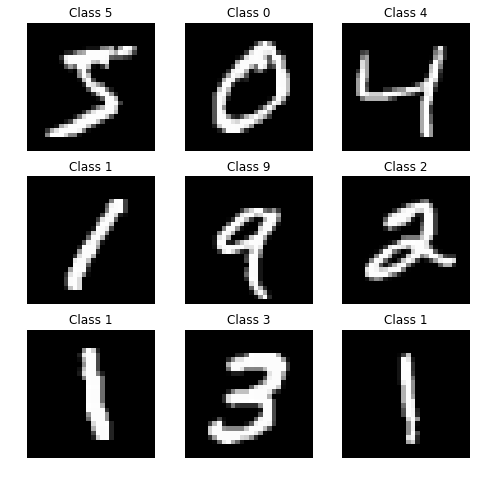

In [58]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format Data
Before we build the model, let's make some minor adjustments.

In [59]:
# Resize features data to contain dimension for channels
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

# Resize labels to be 1D vector
y_train = np.reshape(y_train, (60000, 1))
y_test = np.reshape(y_test, (10000, 1))

print("new x_train shape is: ", x_train.shape)
print("new y_train shape is: ", y_train.shape)

print("new x_test shape is: ", x_test.shape)
print("new y_test shape is: ", y_test.shape)

# Convert labels to categories
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

new x_train shape is:  (60000, 28, 28, 1)
new y_train shape is:  (60000, 1)
new x_test shape is:  (10000, 28, 28, 1)
new y_test shape is:  (10000, 1)


## Build Model
Now let's build the CNN model.

In [68]:
# Create model
model = Sequential()

# Add first convolutional layer
model.add(Conv2D(input_shape=(28,28,1), data_format='channels_last',
                filters=32, kernel_size=(3,3), strides=(1,1),
                padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',
                       data_format='channels_last'))

# Add second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                 padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add third convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),
                 padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',
                       data_format='channels_last'))

# Flatten 
model.add(Flatten())

# Add a dense layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add one more dense layer (for good measure)
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Finally, add softmax layer
model.add(Dense(10)) #for 10 classes
model.add(Activation('softmax'))

# Compile model with adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model
Now let's actually train the model.

In [69]:
model.fit(x_train, y_train, batch_size=128,
         epochs=5, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.1170 - acc: 0.9652 - val_loss: 0.0756 - val_acc: 0.9760
Epoch 2/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0428 - acc: 0.9868 - val_loss: 0.0339 - val_acc: 0.9893
Epoch 3/5
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0330 - acc: 0.9895 - val_loss: 0.0437 - val_acc: 0.9850
Epoch 4/5
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0261 - val_acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0227 - acc: 0.9928 - val_loss: 0.0290 - val_acc: 0.9911


Performance actually decreased after the 4th epoch, so we'll leave num_epoch at 4.

## Evaluate Model
Let's see how well our model ended up doing.

In [70]:
score = model.evaluate(x_test, y_test)

print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 9s 856us/step
Test score: 0.02904326814498054
Test accuracy: 0.9911


Our CNN did end up performing remarkably better than our MLP in just 4 epochs (97.9% -> 99.15%) !

Lets just take a look at a few examples that went wrong:

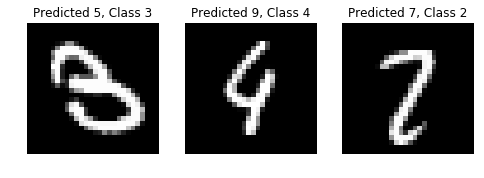

In [71]:
predictions = model.predict_classes(x_test)
i, count = 0, 1

plt.figure(figsize=(8,8))
while count < 4 and i < 60000:
    if predictions[i] != labels[i]:
        plt.subplot(1,3,count)
        plt.axis('off')
        plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predictions[i], labels[i]))
        count += 1
    i += 1

Even I can barely correctly identify these examples!